# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : DEATH_EVENT dari Google Could

Objective : Memprediksi seorang pasien akan meninggal atau tidak. Sebagai Data Science, saya akan melakuan analisis mengenai hubungan antara fitur death event (terget/y) yang jenis data berbentuk kategorik terhadap satu atau lebih variabel (fitur/X) berupa faktor-faktor yang mempengaruhi kematian/kesehatan seorang pasien. Saya akan melakukan prediksi Classification seorang pasien 1= Hidup dan 0= Meniggal, dari beberapa fitur yang bisa mendukung.
Berdasarkan hal ini, maka saya akan menanalisis peluang hidup seorang pasien dengan dua metode yaitu Random Forest dan AdaBoosting.

Dataset dapat diperoleh melalui bigquery, mengambil data Project ID : ftds-hacktiv8-project, Dataset Name : phase1_assignments, Table Name : heart-failure. Menggunakan beberapa fitur yang di query, berikut salin query yang telah dibuat di Google Cloud Platform :

`select * from ftds-hacktiv8-project.phase1_assignments.heart-failure`# Menampilkan beberapa yang fitur yang akan dianalisis dan target peluang seorang pasien

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Import libraries digunakan untuk mengimpor isi modul dan digunakan untuk mendukung beberapa perintah sintaks yang akan di jalankan. Pada proses machine learning Graded Challenge 3 akan menggunakan library sebagai berikut :

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install feature-engine
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from feature_engine.outliers import Winsorizer 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 56.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


library yang akan saya gunakan untuk mengerjakan graded challenge ini dari library numpy, pandas, matplotlib, seaborn dan beberapa modul sklearn yang bervariasi untuk penggunaan dalam mendukung jalannya suatu model.

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/h8dsft_P1G3_Hillidatul_ilmi.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [5]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [6]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(299, 13)


Berdasarkan perintah .shape bahwa ukuran dataset riwayat seorang pasien terdiri dari 299 baris dan 13 kolom.

In [7]:
# Melihat Nama-Nama kolom dari tabel dataset
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Berdasarkan perintah data.columns terdapat beberapa nama kolom yang membinggungkan secara arti makna kata. Agar saya lebih mudah memahami masing-masing kolom, maka akan saya ubah beberapa nama kolomnya. Perubahan nama kolom agar mempermudah dalam mendefinisikan data. Saya akan mengubah seluruh nama kolom, agar lebih gampang memahami isi datanya.

In [8]:
# Mengubah Nama Kolom dari tabel dataset kartu kredit default
data.rename(columns={'age': 'Usia','anaemia': 'Anemia', 'creatinine_phosphokinase':'kreatinin_fosfokinase',
                     'ejection_fraction': 'Pecahan_Ejeksi','high_blood_pressure':'Tekanan_Darah_Tinggi','platelets': 'trombosit',
                     'serum_creatinine':'Kreatinin_Serum','serum_sodium': 'Natrium_Serum',
                     'sex':'JenisKelamin','smoking': 'Perokok','time':'Waktu'}, inplace=True)
data

,Usia,Anemia,kreatinin_fosfokinase,diabetes,Pecahan_Ejeksi,Tekanan_Darah_Tinggi,trombosit,Kreatinin_Serum,Natrium_Serum,JenisKelamin,Perokok,Waktu,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [9]:
# Melihat Nama-Nama kolom dari tabel dataset yang telah diubah
data.columns

Index(['Usia', 'Anemia', 'kreatinin_fosfokinase', 'diabetes', 'Pecahan_Ejeksi',
       'Tekanan_Darah_Tinggi', 'trombosit', 'Kreatinin_Serum', 'Natrium_Serum',
       'JenisKelamin', 'Perokok', 'Waktu', 'DEATH_EVENT'],
      dtype='object')

Nama-Nama kolom telah diubah seperti, merubah nama kolom Usia, Anemia, kreatinin_fosfokinase, diabetes, Pecahan_Ejeksi, Tekanan_Darah_Tinggi, trombosit, Kreatinin_Serum, Natrium_Serum, JenisKelamin, Perokok dan Waktu. Setelah dilakukan perubahan nama kolom membuat saya lebih mudah memahami makna data dan lebih mudah menafsirkan definisi setip data.

In [10]:
# Mengecek informasi dataset dari tabel dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Usia                   299 non-null    float64
 1   Anemia                 299 non-null    int64  
 2   kreatinin_fosfokinase  299 non-null    int64  
 3   diabetes               299 non-null    int64  
 4   Pecahan_Ejeksi         299 non-null    int64  
 5   Tekanan_Darah_Tinggi   299 non-null    int64  
 6   trombosit              299 non-null    float64
 7   Kreatinin_Serum        299 non-null    float64
 8   Natrium_Serum          299 non-null    int64  
 9   JenisKelamin           299 non-null    int64  
 10  Perokok                299 non-null    int64  
 11  Waktu                  299 non-null    int64  
 12  DEATH_EVENT            299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan perintah data.info() bahwa tabel riwayat para pasien memiliki sekitar 13 kolom, dimana semua kolom teridentifikasi sebagai type integer dan float sebagai kolom numerik, sebanarnya berdasarkan definisi keterangan masing-masing kolom data set yang telah dijelaskan bagian atas sebelumnya, bahwa 5 kolom adalah data kategorik dan 8 kolom adalah data numerik. Akan tetapi hal ini lebih mempermudah analisis, karena tidak perlu mengkonveksi data kategorik menjadi numerik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

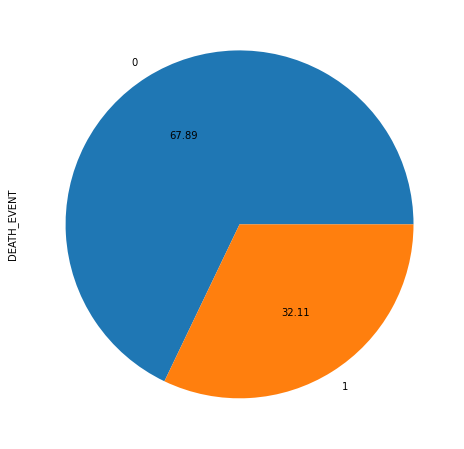

In [11]:
# Visualiasi diagram pie mengenai fitur kartu kredit default
data['DEATH_EVENT'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Keterangan Visualisasi Fitur DEATH_EVENT :

Visualisasi diagram pie menunjukan mengenai kemungkinan untuk hidup atau meninggal dari riwayat kesehatan para pasien. Berdasarkan visualisasi menunjukkan para pasien yang meninggal lebih dominan sebesar 67.89% artinya tidak bisa sehat kembali melainkan meninggal jika dilihat dari beberapa riwayat rekap medisnya yang sudah tidak baik. Sedangkan para pasien yang masih bertahap atau hidup sehat kembali sebesar 32.11%. Jika dibandingkan pasien yang meninggal dengan pasien hidupa sehat, perbandingannya sangat berbeda. Hal ini bisa menjadi evalusi para pasien untuk lebih memperhatikan jenis konsumsi maupun kesehatan anggota tubuh lainya, agar lebih sehat. sedangkan untuk rumah sakit penyedia layanan kesehatan, bisa memperhatikan jenis obat yang tepat agar bisa beraksi dengan baik terhadap tubuh pasien, sehingga peluang hidupnya ada.

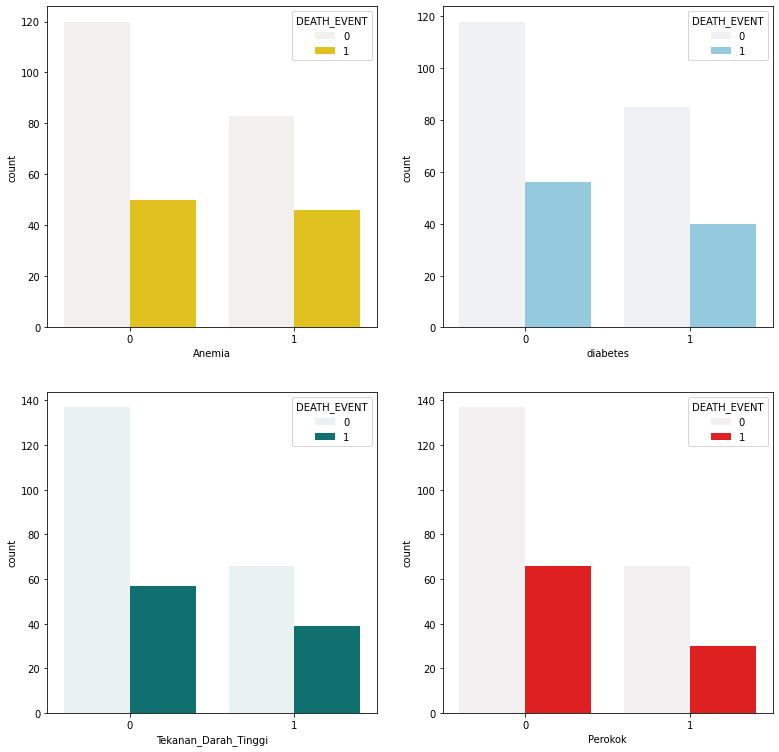

In [61]:
# Visualisasi histogran untuk fitur berupa data numerik dari tabel dataset kartu kredit default
fig,axs=plt.subplots(2,2, figsize=(13,13))
sns.countplot(data=data, x='Anemia', hue="DEATH_EVENT",color='gold', ax=axs[0,0])
sns.countplot(data=data, x='diabetes',  hue="DEATH_EVENT",color='skyblue', ax=axs[0,1])
sns.countplot(data=data, x='Tekanan_Darah_Tinggi',  hue="DEATH_EVENT",color='teal', ax=axs[1,0])
sns.countplot(data=data, x='Perokok',  hue="DEATH_EVENT",color='red', ax=axs[1,1])
plt.show()

Keterangan Visualisasi Fitur berkategori data kategorik dengan Death_event sebagai berikut :

Deskripsi data death_event nilai 0 (pasien meninggal dunia) dan nilai 1 (pasie hidup sehat kembali)

Visualisasi histogram data kategorik :

1. Data Anemia, merupakan data pasien yang Kurang darah atau anemia. Dimana kondisi tubuh kekurangan sel darah merah yang sehat atau ketika sel darah merah tidak berfungsi dengan baik. Nilai 0 menandakan pasien kekurangan darah atau anemia sedangkan nilai 1 menandakan pasien tidak kekurangan dara merah atau tidak anemia. Berdasarkan visualisasi data, Pasien yang meninggal dunia lebih dominan memiliki riwayat kekurangan darah, walaupun terlihat pasien hidup sehat juga dominan memiliki riwayat kekurangan darah. Tetapi jumlah pasien dengan riwayat kekurangan darah lebih mempunyai kemungkinan meniggal lebih besar.
2. Data Diabetes, merupakan data pasien mengenai kadar gula dalam tubuh. Diabetes didefinisikan sebagai suatu penyakit atau gangguan metabolisme kronis dengan multi etiologi yang ditandai dengan tingginya kadar gula darah. Nilai 0 menandakan pasien memiliki kadar gula yang tinggi sedangkan nilai 1 menandakan pasien memiliki kadar gula yang normal. Berdasarkan visualisasi data, Pasien yang meninggal dunia lebih dominan memiliki riwayat kadar gula tinggi, walaupun terlihat pasien hidup sehat juga dominan memiliki riwayat kadar gula tinggi. Tetapi jumlah pasien dengan riwayat kadar gula tinggi lebih mempunyai kemungkinan meniggal lebih besar.
3. Data Tekanan darah tinggi, merupakan data pasien jika pasien memiliki hipertensi. Tekanan darah tinggi atau disebut juga hipertensi adalah suatu kondisi ketika seseorang mempunyai tekanan darah yang terukur pada nilai lebih dari 130/80.  Nilai 0 menandakan pasien memiliki hipertensi yang tinggi sedangkan nilai 1 menandakan pasien memiliki hipertensi yang normal. Berdasarkan visualisasi data, Pasien yang meninggal dunia lebih dominan memiliki riwayat hipertensi yang tinggi, walaupun terlihat pasien hidup sehat juga dominan memiliki riwayat ipertensi yang tinggi. Tetapi jumlah pasien dengan riwayat hipertensi lebih mempunyai kemungkinan meniggal lebih besar. Hal ini bisa menjadi evaluasi secara mandiri pasien untuk mengatur pola makan sehat dengan sedikit garam, olahraga rutin, dan konsumsi obat dapat membantu menurunkan tekanan darah.
4. Data Perokok, merupakan riwayat pasien yang merokok. Nilai 0 menandakan pasien seorang perokok dan nilai 1 menandakan pasien merupakan perokok pasif atau tidak merokok. Berdasarkan visualisasi data, pasien yang meninggal dunia dahulu ketika sehat sebagai perokok aktif. Walaupun pasien hidup sehat juga ebih dominasi para perokok aktif, namu bisa berbahya untuk beberapa tahun kemudain di masa depan.

Berdasarkan visualisasi banyak set data kategorik terdapa Death event, yang artinya pasien yang meninggal dunia karena memiliki riwaya kesehatan tubuh tidak baik, dari kekurangan dara, mengalami diabetes, tekanan darah yang tinggi dan perokok aktif. Sehingga bisa menjadi evalusia untuk para pasien yang sehat untuk lebih memperhatikan konsumsi makanan dan pola hidup sehat lainnya.

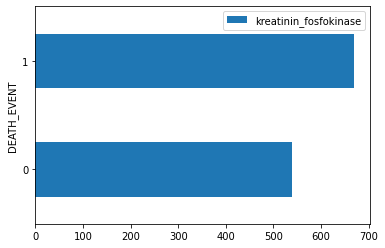

In [13]:
data.groupby(by='DEATH_EVENT')[['kreatinin_fosfokinase']].mean().plot(kind='barh')

Kreatinin Fosfokinase adalah sejenis enzim yang dapat ditemukan pada otot rangka, jantung, serta sedikit di otak. Kadar kreatin fosfokinase dapat meningkat ketika otot-otot pada sel saraf terluka atau mengalami cedera. Jadi kreatini fosfokinase sebagai pengobat luka dan cidera yang alami dari tubuh. Berdasarkan visualisasi Kreatinin Fosfokinase dengan enzim yang baik bernilai 1, akan membantu pasien untuk sehat secara alamiah berdasarkan enzim dalam tubuh. Tetapi jika Kreatinin Fosfokinase dengan enzim yang tidak baik bernilai 0, tidak akan bisa membantu tubuh secara alamiah mengobati otat-otak yang terluka.

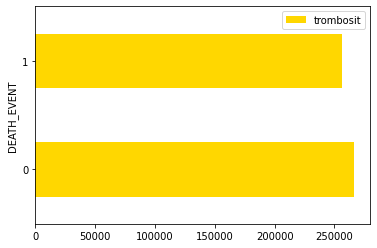

In [14]:
data.groupby(by='DEATH_EVENT')[['trombosit']].mean().plot(kind='barh',color='gold')

Trombosit atau keping sel darah merupakan salah satu pemeran utama dalam proses pembekuan darah. Bila kadar trombosit di dalam tubuh kamu tidak mencukupi atau turun, bisa dipastikan proses pembekuan darah akan sangat terganggu. Berdarkan visualisasi bahwa pasien yang meninggal dunia (0) lebih dominasi tinggi karena memiliki trombosit tidak mencukupi dalam tubuhnya. Sedangkan pasien yang hidup sehat (1) juga masih ada riwayat trombosit, tetapi juga terbilang memiliki trombosit tidakk mencukupi.

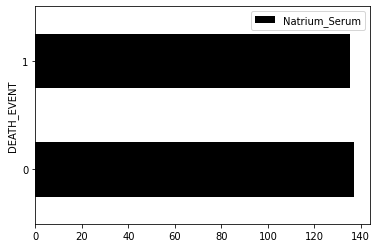

In [15]:
data.groupby(by='DEATH_EVENT')[['Natrium_Serum']].mean().plot(kind='barh',color='black')

Kadar natrium serum adalah parameter utama yang digunakan untuk menilai tonisitas serum yang sering terganggu akibat hiperglikemia. Efek hiperglikemia terhadap penurunan konsentrasi natrium plasma telah diketahui sejak separuh abad yang lalu. Berdarkan visualisasi bahwa pasien yang meninggal dunia (0) lebih dominasi tinggi karena memiliki natrium serum plasma yang turun. Sedangkan pasien yang hidup sehat (1)juga masih ada riwayat natrium serum, tetapi juga terbilang memiliki natrium serum plasma yang turunt tidak mencukupi dalam tubuh.

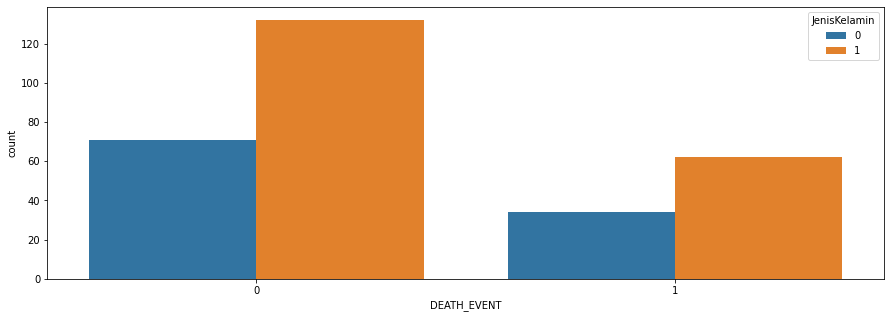

In [16]:
plt.figure(figsize = (15,5))
sns.countplot("DEATH_EVENT", hue = 'JenisKelamin', data=data)
plt.show()

Data Jenis Kelamin, merupakan gender para pasien. Nilai 0 menandakan seorang pasien wanita dan nilai 0 menedakan pasien seorang laki-laki. Berdasarkan hasil visuaisasi bahwa pasien meninggal dunia didominasi oleh wanita urutan kedua laki-laki. Begitu juga data pasien Hidup sehat didominasi oleh wanita lalu urutan kedua laki-laki.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5a - Data Inference

Dikutip dari aws.amazon.com, Inferensi adalah proses membuat prediksi menggunakan model terlatih. Model inference adalah data yang tidak tersedia di dalam dataset, jika dicari datanya tidak ada, maka di masukkan data baru. Jadi model inference itu data baru yang tidak ada di data set. Data inference menggunakan dataset yang ada.

Dataset terbagi menjadi dua yaitu inference set dan Non inference set (Train set & Test set)

In [17]:
# Dapatkan Data untuk Inferensi Model

datainfernce = data.sample(10, random_state=10) 
datainfernce

,Usia,Anemia,kreatinin_fosfokinase,diabetes,Pecahan_Ejeksi,Tekanan_Darah_Tinggi,trombosit,Kreatinin_Serum,Natrium_Serum,JenisKelamin,Perokok,Waktu,DEATH_EVENT
24,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
64,65.0,0,582,1,40,0,270000.00,1.0,138,0,0,140,0
102,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
170,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
285,85.0,0,129,0,60,0,306000.00,1.2,132,1,1,90,1
139,59.0,1,176,1,25,0,221000.00,1.0,136,1,1,150,1
198,40.0,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
129,57.0,1,115,0,25,1,181000.00,1.1,144,1,0,79,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
280,53.0,0,56,0,50,0,308000.00,0.7,135,1,1,231,0


Dari sekumpulan informasi dataset kartu kredit default, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [18]:
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test = data.drop(datainfernce.index)
data_train_test

,Usia,Anemia,kreatinin_fosfokinase,diabetes,Pecahan_Ejeksi,Tekanan_Darah_Tinggi,trombosit,Kreatinin_Serum,Natrium_Serum,JenisKelamin,Perokok,Waktu,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [19]:
data.shape

(299, 13)

Ketika belum memisahkan data inference dari dataset bahwa, jumlah dataset awal riwayat para pasien memiliki 299 baris kemudian menghilangkan/memisahkan data inference dari dataset kartu kredit default berubah menjadi 289 baris.

In [20]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_train_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,Usia,Anemia,kreatinin_fosfokinase,diabetes,Pecahan_Ejeksi,Tekanan_Darah_Tinggi,trombosit,Kreatinin_Serum,Natrium_Serum,JenisKelamin,Perokok,Waktu,DEATH_EVENT
0,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
1,65.0,0,582,1,40,0,270000.00,1.0,138,0,0,140,0
2,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
3,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
4,85.0,0,129,0,60,0,306000.00,1.2,132,1,1,90,1
5,59.0,1,176,1,25,0,221000.00,1.0,136,1,1,150,1
6,40.0,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
7,57.0,1,115,0,25,1,181000.00,1.1,144,1,0,79,0
8,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
9,53.0,0,56,0,50,0,308000.00,0.7,135,1,1,231,0


Dibagian data inference indexnya tidak terurut karena menyesuaikan letak baris dari data yang tidak termasuk dataset kartu kredit default, tetapi setelah di reset index jadi tersusun index nomornya. Dilakukan restart index, agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

## 5b - Splitting Dataset

Splitting Data merupakan pemisahan untuk membuat X sebagai fitur dan Y sebagai target menjadi Train/Test. Train/test split sebagai salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning.

In [21]:
# Pemisahan `X` (Fitur) dan `y` (Target)

X = data_train_test.drop('DEATH_EVENT', axis=1) #menghapus kolom axis=1 pembayaran default, untuk dimasukkan dan dibagi menjadi train/test
y = data_train_test['DEATH_EVENT']

In [22]:
# Split between Train-Set and Test-Set

# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (231, 12)
Test Size :  (58, 12)


Dilakukan proses penghapusan kolom death event untuk dialihkan sebagai training set dan testing set, dari data death event yang telah dialihkan lalu akan dilakukan proses tetrain_test_split dengan menjadi 80% death event masuk ke X_tarin dan 20% masuk ke y_train. X_train menggunakan 231 (80%) dari 299 baris dan y_train menggunakan 231 (sisa 20%) dari 299 baris.

## 5c - Feature Selection

Dikutip dari trivusi.web.id, Feature selection atau seleksi fitur adalah teknik preprocessing dengan mengurangi jumlah fitur yang tidak relevan untuk menentukan kelas target.

Feature selectian bisa pake heat map, mencari nilai korelasi antara kolom fitur dengan kolom target setinggi mungkin atau serendah mungkin. Mencari korelasinya yang mendekati 1 kalau nilainya nol bisa di drop karena tidak ada korelasinya kolom fitur dengan kolom target. Target berkeinginan harus ada korelasinya.

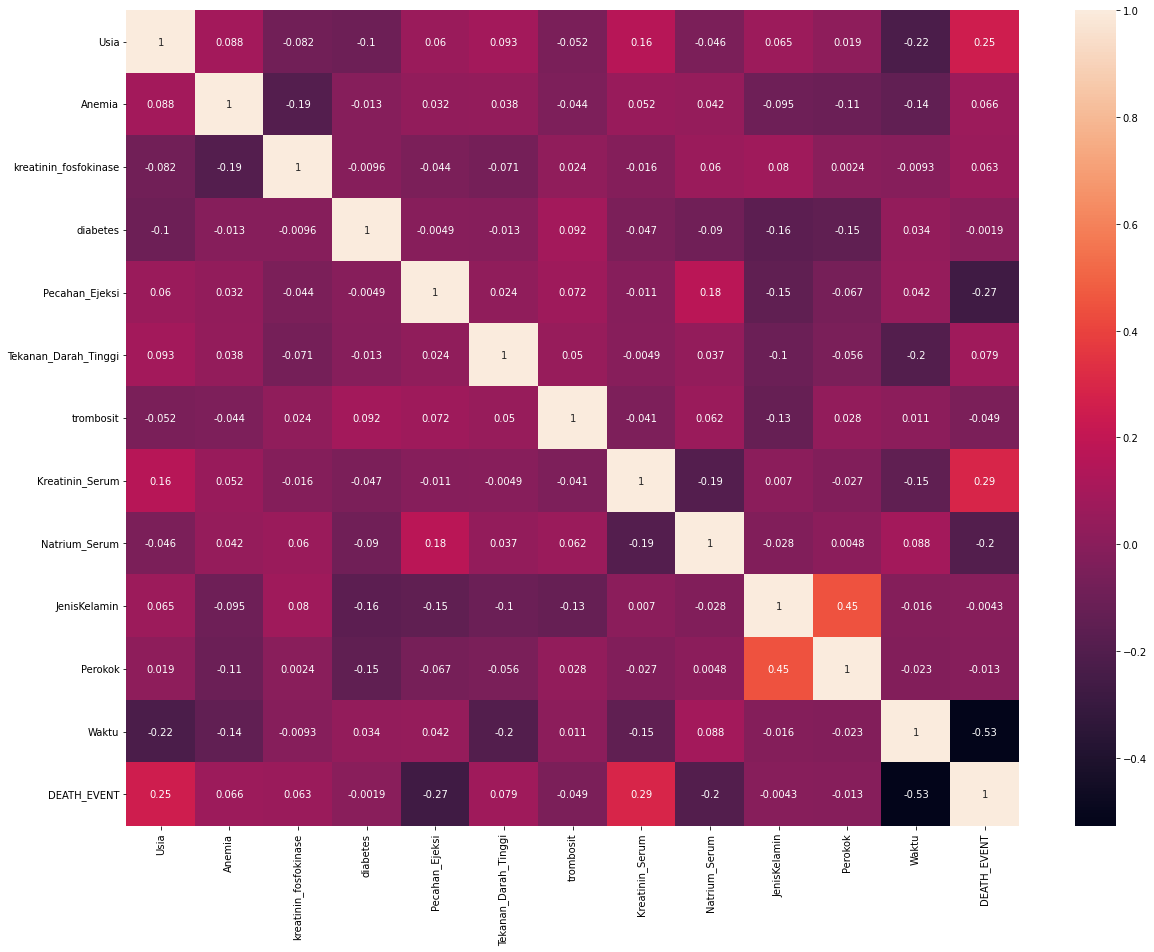

In [23]:
# Melihat Korelasi antara Fitur dengan target
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Berdasarkan nilai korelasi target usia, anemia, kreatinin_fosfokinase, teknan darah tinggi dan kreatinin serum memiliki score yang lebih baik dibandingkan 12 fitur lainnya. Tetapi untuk lebih meyakinkan dilakukan proses feature importances untuk melihat score fitur yang tertiggi dalam mempengaruhi target death event.

In [24]:
# Feature selection untuk fitur-fitur yang akan digunakan atau diduga mempengaruhi target
# Membuat klasifikasi untuk n estimator beberapa fitur
selectionFitur = RandomForestClassifier(n_estimators=100, random_state=0)
selectionFitur.fit(X_train, y_train)

# Melihat nilai score hasil training untuk masing-masing fitur
score_fitur = pd.Series(selectionFitur.feature_importances_, index=X_train.columns).sort_values(ascending=False)
score_fitur

Waktu                    0.344661
Kreatinin_Serum          0.158769
Pecahan_Ejeksi           0.120959
kreatinin_fosfokinase    0.086680
Usia                     0.084446
trombosit                0.077169
Natrium_Serum            0.065814
Anemia                   0.013674
Tekanan_Darah_Tinggi     0.012844
Perokok                  0.012725
diabetes                 0.011828
JenisKelamin             0.010430
dtype: float64

Nilai score fitur yang diduga mempangaruhi event death menghasilkan nilai dari yang terbesar hingga tertinggi. Berdasarkan nilai score fitur tersebut saya memilih 6 fitur, yaitu Waktu, Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase, Usia dan trombosit.  

In [25]:
# Menghapus fitur-fitur yang tidak digunakan, hanya mengunakan fitur yang diduga mempengaruhi target
X_train.drop(['Natrium_Serum','Anemia','Tekanan_Darah_Tinggi','Perokok','diabetes','JenisKelamin'], axis=1, inplace=True)
X_test.drop(['Natrium_Serum','Anemia','Tekanan_Darah_Tinggi','Perokok','diabetes','JenisKelamin' ], axis=1, inplace=True)

Berdasarkan pemilihan feature selection, bahwa fitur yang tidak digunakan akan langsung didrop atau dihilangkan. Fitur dengan score rendah tersebut tidak akan digunakan karena diduga tidak terlalu baik dalam mempengaruhi target pembayaran default.

## 5d - Handling Missing Value

Dikutip dari file.upi.edu.com, Missing value adalah informasi yang tidak tersedia untuk sebuah objek (kasus). Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada. Pada proses ini akan dilakukan pengecekan data missing value dengan .info() terlebih dahulu :

In [26]:
# Mengecek Missing Values on X_train
X_train.isnull().sum()

Usia                     0
kreatinin_fosfokinase    0
Pecahan_Ejeksi           0
trombosit                0
Kreatinin_Serum          0
Waktu                    0
dtype: int64

In [27]:
# Mengecek Missing Values on X_test
X_test.isnull().sum()

Usia                     0
kreatinin_fosfokinase    0
Pecahan_Ejeksi           0
trombosit                0
Kreatinin_Serum          0
Waktu                    0
dtype: int64

In [28]:
# Mengecek Missing Values on y_train
y_train.isnull().sum()

0

In [29]:
# Mengecek Missing Values on y_test
y_test.isnull().sum()

0

Setelah di lakukan proses handling missing value maka variabel X_train, X_test, y_train dan y_test bahwa tidak terdapat missing value yang artinya sudah bersih dari Nan data. Selanjutnya akan dilakukan handling outlier.

## 5e - Handling Outlier

In [30]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data census_adult_income dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

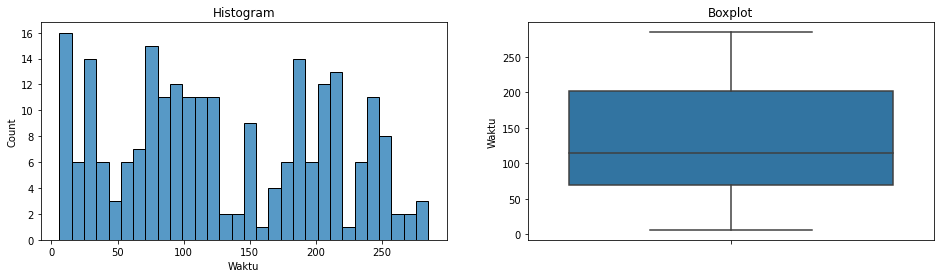


Skewness Value Waktu :  0.146174961849834


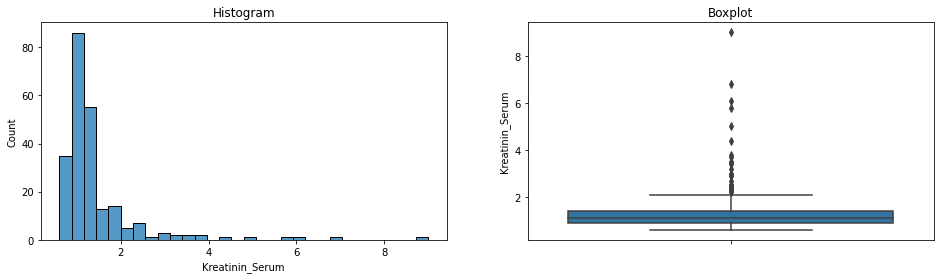


Skewness Value Kreatinin_Serum :  4.019713184287383


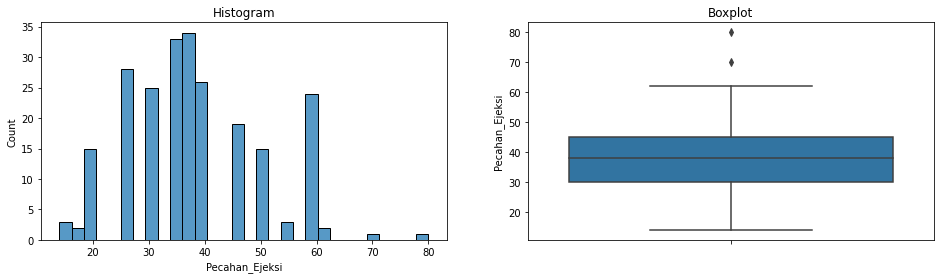


Skewness Value Pecahan_Ejeksi :  0.5184039494534635


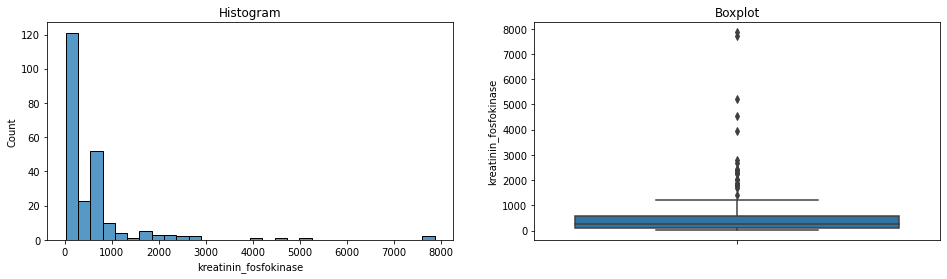


Skewness Value kreatinin_fosfokinase :  4.728657362782096


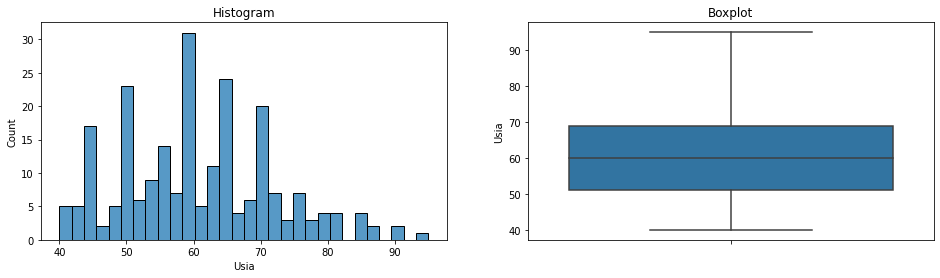


Skewness Value Usia :  0.3673320441169616


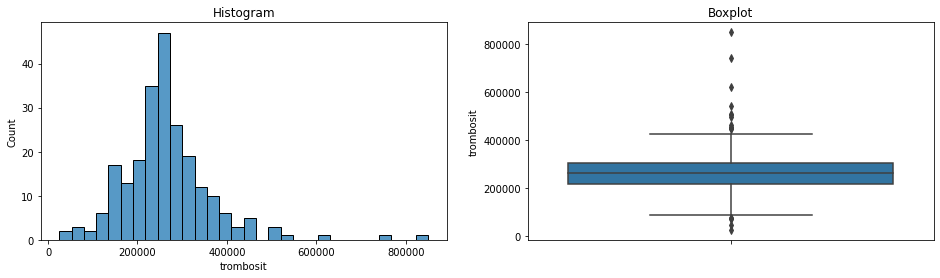


Skewness Value trombosit :  1.6113318704051955


In [31]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(X_train, 'Waktu')
print('\nSkewness Value Waktu : ', X_train['Waktu'].skew())

diagnostic_plots(X_train, 'Kreatinin_Serum')
print('\nSkewness Value Kreatinin_Serum : ', X_train['Kreatinin_Serum'].skew())

diagnostic_plots(X_train, 'Pecahan_Ejeksi')
print('\nSkewness Value Pecahan_Ejeksi : ', X_train['Pecahan_Ejeksi'].skew())

diagnostic_plots(X_train, 'kreatinin_fosfokinase')
print('\nSkewness Value kreatinin_fosfokinase : ', X_train['kreatinin_fosfokinase'].skew())

diagnostic_plots(X_train, 'Usia')
print('\nSkewness Value Usia : ', X_train['Usia'].skew())

diagnostic_plots(X_train, 'trombosit')
print('\nSkewness Value trombosit : ', X_train['trombosit'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Enam Fitur berupa Waktu, Pecahan_Ejeksi, Usia dan trombosit, semua datanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya. Sedangkan fitur Kreatinin_Serum dan kreatinin_fosfokinase, memiliki data tidak berdistribusi normal karena memiliki nilai skewness yang tidak sesuai standarnya. Visualisasi boxplot fitur kreatinin serum, Pecahan_Ejeksi dan kreatinin_fosfokinase terdapat outlier di bagian upper boxplot/bagian atas boxplot. Visualisasi boxplot fitur trombosit terdapat outlier di bagian upper boxplot dan lower boxplot/bagian atas boxplot dan bawah boxplot. Oleh karena itu akan di cari terlebih dahulu nilai IQR untuk menyamakan range nilainya agar masuk ke dalam boxplot. Serta membuat data menjadi berdistribusi normal.

In [32]:
# Menghitung/menentukan nilai IQR untuk data yang terdapat outlier
X_train_ = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['Kreatinin_Serum','Pecahan_Ejeksi','kreatinin_fosfokinase','trombosit'])
X_train_.fit(X_train)
X_trainn = X_train_.transform(X_train) 

Setelah kita mengetahui fitur yang terdapat outlier, selanjutnya akan diatasi outlier tersebut dengan menggunakan metode interquartile range (IQR). IQR akan mentolerir nilai minimum yang jauh dari data dan nilai maksimum yang menjauhi himpunan kelompok data, dengan mengubah range minimum dan maksimum ke dalam kelompok himpunan data yang seharusnya. IQR yang didapat akan dikalikan dengan 1.5 untuk sisi kanan dan sisi kiri. Karena kempat fitur memiliki oulier maka akan dilakukan handling oulier mengunakan metode capping winsorizer, dimana empat fitur Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase dan trombosit akan di toleris range data minimum dan maksimum menjadi kelompok/himpunan yang sama.

In [33]:
# Pemeriksaan perbandingan data outlier
# Periksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Periksa batas maksimum untuk setiap variabel
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'Waktu': -128.75, 'Kreatinin_Serum': 0.15000000000000024, 'Pecahan_Ejeksi': 7.5, 'kreatinin_fosfokinase': -569.25, 'Usia': 24.0, 'trombosit': 85000.0}
           
Right Tail Caps :  {'Waktu': 401.25, 'Kreatinin_Serum': 2.1499999999999995, 'Pecahan_Ejeksi': 67.5, 'kreatinin_fosfokinase': 1272.75, 'Usia': 96.0, 'trombosit': 433000.0}


Berdasarkan nilai minimum oulier untuk fitur waktu adalah -128.75 dan nilai maksimum oulier adalah 401.25. Batas minimum fitur kreatinin_serum adalah 0.15000000000000024 dan nilai maksimum adalah 2.1499999999999995. Batas minimum fitur pecahan_ejeksi adalah 7.5 dan nilai maksimum adalah 67.5. Batas minimum fitur kreatinin_fosfokinase adalah -569.25 dan nilai maksimum adalah 1272.75. Batas minimum fitur usia adalah 24.0 dan nilai maksimum adalah 96.0. Batas minimum fitur trombosit adalah 85000.0 dan nilai maksimum adalah 433000.0.Nilai-nilai ini menujukan nilai ekstrim yang terendah dan tertinggi, menjauhi himpunan data yang seharusnya.


Waktu - Setelah Handling Outlier Capping

Skewness Value Waktu :  0.146174961849834


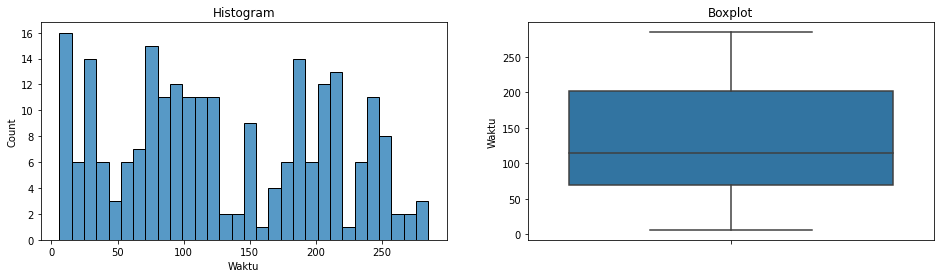


Kreatinin_Serum - Setelah Handling Outlier Capping

Skewness Value Kreatinin_Serum :  0.9119407027174167


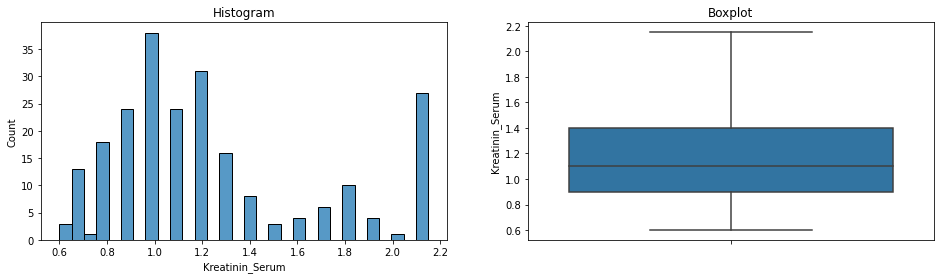


Pecahan_Ejeksi - Setelah Handling Outlier Capping

Skewness Value Pecahan_Ejeksi :  0.4163805267914683


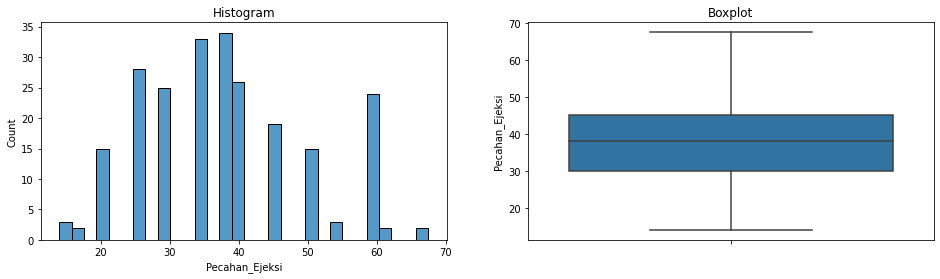


kreatinin_fosfokinase - Setelah Handling Outlier Capping

Skewness Value kreatinin_fosfokinase :  1.091490539052375


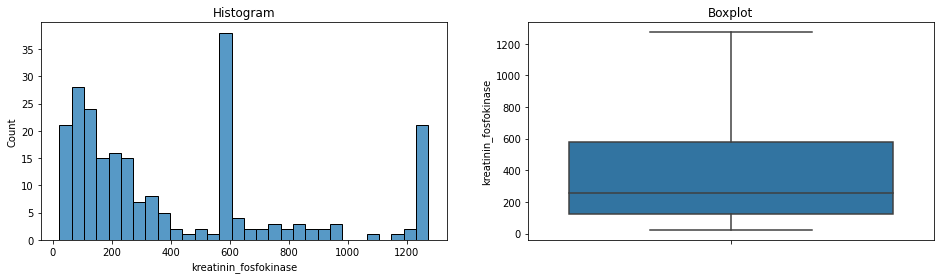


Usia - Setelah Handling Outlier Capping

Skewness Value Usia :  0.3673320441169616


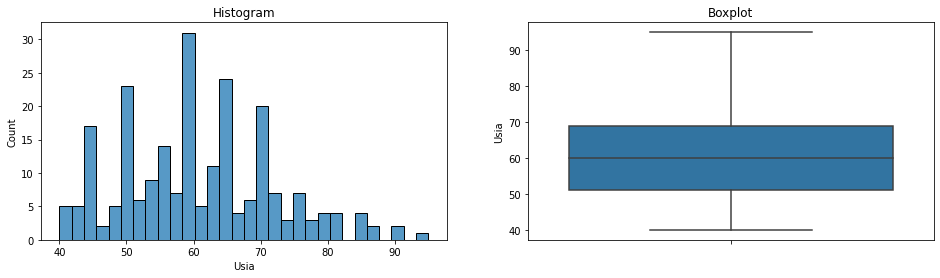


trombosit - Setelah Handling Outlier Capping

Skewness Value trombosit :  0.21949772676589316


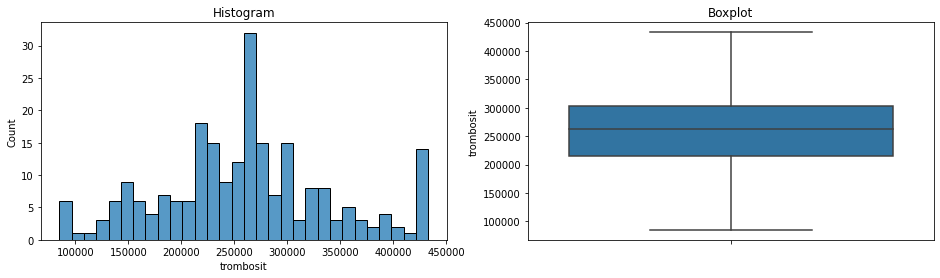

In [34]:
# Visualisasi Setelah Handling Outlier
print('\nWaktu - Setelah Handling Outlier Capping')
print('\nSkewness Value Waktu : ', X_trainn['Waktu'].skew())
diagnostic_plots(X_trainn, 'Waktu')

print('\nKreatinin_Serum - Setelah Handling Outlier Capping')
print('\nSkewness Value Kreatinin_Serum : ', X_trainn['Kreatinin_Serum'].skew())
diagnostic_plots(X_trainn, 'Kreatinin_Serum')

print('\nPecahan_Ejeksi - Setelah Handling Outlier Capping')
print('\nSkewness Value Pecahan_Ejeksi : ', X_trainn['Pecahan_Ejeksi'].skew())
diagnostic_plots(X_trainn, 'Pecahan_Ejeksi')

print('\nkreatinin_fosfokinase - Setelah Handling Outlier Capping')
print('\nSkewness Value kreatinin_fosfokinase : ', X_trainn['kreatinin_fosfokinase'].skew())
diagnostic_plots(X_trainn, 'kreatinin_fosfokinase')

print('\nUsia - Setelah Handling Outlier Capping')
print('\nSkewness Value Usia : ', X_trainn['Usia'].skew())
diagnostic_plots(X_trainn, 'Usia')

print('\ntrombosit - Setelah Handling Outlier Capping')
print('\nSkewness Value trombosit : ', X_trainn['trombosit'].skew())
diagnostic_plots(X_trainn, 'trombosit')

Visualisasi histogram untuk distribusi normal dan boxplot identifikasi data oulier, berdasarkan gambar di atas bahwa fitur Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase, trombosit tetap berdistribusi normal seperti sebelumnya. Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2, dimana keempat fitur tersebut memiliki nilai skewness sesuai standar penentuan. Untuk Data oulier sudah tidak ada lagi, karena semua data dari fitur Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase dan trombosit yang menjauh dari pusat rata-rata sampel telah di sensoring semuanya untuk mempunyai range yang sama dalam kempulan/himpunan data. Sehingga sudah tidak ada lagi data outlier.

In [35]:
# Diperoleh X_trainn yang sudah dilakukan feature engineering 
# Variabel X_trainn sudah bersih dari Missing Value dan Outlier
X_trainn

,Usia,kreatinin_fosfokinase,Pecahan_Ejeksi,trombosit,Kreatinin_Serum,Waktu
193,50.0,298.00,35.0,362000.00,0.90,240.0
130,50.0,369.00,25.0,252000.00,1.60,90.0
21,60.0,582.00,30.0,127000.00,0.90,95.0
263,72.0,127.00,50.0,218000.00,1.00,33.0
76,70.0,69.00,50.0,351000.00,1.00,44.0
...,...,...,...,...,...,...
156,40.0,478.00,30.0,303000.00,0.90,148.0
123,45.0,1272.75,25.0,390000.00,1.00,60.0
15,65.0,128.00,30.0,297000.00,1.60,20.0
125,65.0,113.00,25.0,433000.00,1.83,67.0


Sehingga di peroleh variabel baru berupa X_trainn yang bersih dari missing value dan outlier. Untuk variabel X_test sudah besih dari missing value dan oulier nya tidka perlu dilakukan.

## 5f - Pemisahan Kolom Numerik dan Kategorik

Dikutip dari idikuu.com, Data numerik adalah data yang dapat diukur, kemudian data tersebut dapat kita olah sedemikian rupa seperti diurutkan, dicari rata-rata, paling banyak muncul dan lain sebagainya. Sedangkan Data kategorik adalah jenis data yang terdiri dari variabel atau data dari hasil pengelompokkan berdasarkan kategori yang telah ditentukan. Berdasarkan definisi kedua jenis data tersebut, bahwa terdapat perbedaan karakterstik data pada masing-masing fitur, oleh karena itu harus dilakukan pemisahan.

In [36]:
# Pemisahan data numerik dan data kategorik
num_fitur = ["Usia","kreatinin_fosfokinase","trombosit","Waktu"]
col_fitur = ["Pecahan_Ejeksi", "Kreatinin_Serum"]

# Melakukan standarisasi range data numerik dan kategorik, agar mempunyai range yang sama antar fitur
num_col = Pipeline([("numscaler",MinMaxScaler())])
cat_col = Pipeline([("catscaler",OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Prosesing data numrik dan kategorik yang telah sama rangenya
preprocessor = ColumnTransformer(
    transformers=[
        ("numerik", num_col, num_fitur),
        ("kategorik", cat_col, col_fitur)])


Dilakukan proses pemisahan sesuai jenis data dari masing-masing fitur, misalnya fitur numerikk berupa Usia, kreatinin_fosfokinase, trombosit dan Waktu. Serta fitur kategorik berupa Pecahan_Ejeksi dan Kreatinin_Serum. Tujuan pemisahan berdasarkan jenis data, agar lebih mudah untuk penyamaan skala pada seluruh fitur.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6a - Model Definition Random Forest

In [37]:
# Model definisi untuk algoritma random forest
pipeRF = Pipeline([("RFsacler",preprocessor), ("RFC",RandomForestClassifier(random_state=10))])

In [38]:
# Mencari nilai cross validation random forest
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipeRF, X_trainn, y_train, cv=kf)
print("--Random Forest--")
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

--Random Forest--
Cross Validation array           : [0.80851064 0.82608696 0.86956522 0.86956522 0.89130435]
Best Cross Validation score      : 0.8530064754856614
Standar Deviasi Cross Validation : 0.03072344681538882


Model Definition algoritma Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Random forest merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model, dipakai untuk kumpulan data yang berukuran besar. Random forest memiliki nilai cross validation sebear 85.30% dan standar deviasi cross validation sebesar 0.0307.

## 6b - Model Definition Adaptive Boosting (AdaBoosting)

In [39]:
# Model definisi untuk algoritma AdaBoosting
pipeAdaBC =Pipeline([("AdaBCscaler",preprocessor), ("AdaBC",AdaBoostClassifier(DecisionTreeClassifier(random_state=10)))])

In [40]:
# Mencari nilai cross validation AdaBoosting
kf=KFold(n_splits=5)
scoresAdaBC = cross_val_score(pipeAdaBC, X_trainn, y_train, cv=kf)
print("--AdaBoosting--")
print("Cross Validation array           :",scoresAdaBC)
print("Best Cross Validation score      :",scoresAdaBC.mean())
print("Standar Deviasi Cross Validation :",scoresAdaBC.std())

--AdaBoosting--
Cross Validation array           : [0.74468085 0.7173913  0.80434783 0.80434783 0.82608696]
Best Cross Validation score      : 0.7793709528214616
Standar Deviasi Cross Validation : 0.04117026447045446


Metode Definition algoritma Adaptive Boosting (AdaBoosting) klasifikasi adalah metode boosting yang mampu menyeimbangkan kelas dengan memberikan bobot pada tingkat error klasifikasi. AdaBoosting memiliki nilai cross validation sebear 77.93% dan standar deviasi cross validation sebesar 0.0411.

Berdasarkan best cross validation bahwa algoritma Random Forest lebih baik dibandingkan jenis algoritma lainnya dengan CV sebesar 85.30%, Sedangkan untuk algoritma AdaBoosting yang memiliki nilai CV sebesar 77.93%. Lalu akan di cari hyperparameter terbaik dari algoritma Random Forest.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7a - Model Training Random Forest

In [41]:
# Model training random forest dengan penentuan estimator secara langsung
model_RF = pipeRF.fit(X_trainn,y_train)

In [42]:
# Mencari Parameter terbaik dari estimator yang telah ditentukan
param_grid_RF = {'RFC__n_estimators' : [1, 10, 100],
                 'RFC__max_depth': [1, 2, 3], 
                 'RFC__min_samples_split': [1, 2, 3],
                 'RFC__min_samples_leaf' : [1, 2, 3]}

In [43]:
# Hyperparameter tuning melakukan kombinasi estimator 
gridRF = GridSearchCV(pipeRF, param_grid_RF, cv=5)
gridRF.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RFsacler',
                                        ColumnTransformer(transformers=[('numerik',
                                                                         Pipeline(steps=[('numscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Usia',
                                                                          'kreatinin_fosfokinase',
                                                                          'trombosit',
                                                                          'Waktu']),
                                                                        ('kategorik',
                                                                         Pipeline(steps=[('catscaler',
                                                                                          O

In [44]:
# Mendapatkan model training svm hyperparameter best estimator terbaik
model_RF_gridsearchCV = gridRF.best_estimator_
model_RF_gridsearchCV

Pipeline(steps=[('RFsacler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['Usia',
                                                   'kreatinin_fosfokinase',
                                                   'trombosit', 'Waktu']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pecahan_Ejeksi',
                                                   'Kreatinin_Serum'])])),
                ('RFC', RandomForestClassi

In [45]:
# Mencari nilai cross validation setelah hyperparameter best estimator
scores = cross_val_score(model_RF_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_svm_gridsearchCV array     :",scores)
print("Best Cross Validation Score model_svm_gridsearchCV      : {:.2f}".format(gridRF.best_score_))
print("Standar Deviasi Cross Validation model_svm_gridsearchCV : {:.2f}".format(gridRF.best_score_.std()))

Cross Validation Score model_svm_gridsearchCV array     : [0.74468085 0.80434783 0.80434783 0.89130435 0.89130435]
Best Cross Validation Score model_svm_gridsearchCV      : 0.83
Standar Deviasi Cross Validation model_svm_gridsearchCV : 0.00


Telah dilakukan GridseachCV terhadap model terbaik yaitu random forest. Dimana sebelum menggunakan parameter terbaik mempunyai nilai CV sebesar 85.30% dan standar deviasi cross validation sebesar 0.0307. Sedangkan setelah menggunakan estimator terbaik max_depth=3, memiliki nilai CV sebesar 83% dan standar deviasi cross validation sebesar 0.00. Berdasarkan perbandingan tersebut, bahwa nilai cross validation hasil estimasi hyperparameter terbaik nilainya tidak lebih baik dari estimasi tanpa hyperparameter tunning mempunyai nilai yang sama yaitu 83%, tetapi jika di tinjau dari nilai standar deviasi dengan estimasi terbaik bernilai 0, artinya validasi berulang di mana dataset training dan testing menurun nilai error standarnya.

## 7b - Model Training AdaBoosting

In [46]:
# Model training AdaBoosting dengan penentuan estimator secara langsung
model_AdaBC = pipeAdaBC.fit(X_trainn,y_train)
model_AdaBC

Pipeline(steps=[('AdaBCscaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['Usia',
                                                   'kreatinin_fosfokinase',
                                                   'trombosit', 'Waktu']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pecahan_Ejeksi',
                                                   'Kreatinin_Serum'])])),
                ('AdaBC',
             

Berdasarkan nilai cross validation algortima AdaBoosting bernilai 77,93%, yang bukan merupkan algoritma terbaik, sehingga tidak saya lakukan proses hpyerparameter tuning tetapi menggunakan estimator default secara langsung.

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8a - Model Evaluation Random Forest

In [47]:
# Performa Accuracy Model random forest
y_pred_train_RF = model_RF.predict(X_trainn)
y_pred_test_RF = model_RF.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RF))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RF))

accuracy score train :  1.0
accuracy score test :  0.7931034482758621


In [48]:
# Performa Accuracy Model random forest Best Estimator hasil GridsearchCV
y_pred_train_RF_gridsearchCV = model_RF_gridsearchCV.predict(X_trainn)
y_pred_test_RF_gridsearchCV = model_RF_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RF_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RF_gridsearchCV))

accuracy score train :  0.8787878787878788
accuracy score test :  0.8275862068965517


Ketepatan atau akurasi model svm tanpa estimator terbaik memiliki nilai training sebesar 100% dan testing sebesar 79.31%, artinya masih di kategorikan underfit, karena rentang nilai sangat jauh berbeda. Sedangkan Ketepatan atau akurasi model svm menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 87.87% dan testing sebesar 82.75%, artinya masih di kategorikan goodfit,karena nilai rentang nya hampie sama dimana model random forest ini akan bisa memprediksi death event dari pasien. Berdasarkan perbedaan accuracy model tanpa estimator terbaik dengan accuracy model menggunakan estimator terbaik, terdapat acurracy yang sangat signifikansi berbeda. Menandakan bahwa tanpa pencarian estimator terbaik, model sangat bagus dalam memprediksi target death event.

In [49]:
# classification model untuk memprediksi peluang yang terjadi menggunakan best estimator
print('classification report Logistic Regression Best Estimator Train Set')
print(classification_report(y_train,y_pred_train_RF_gridsearchCV))
print('                                  ')
print('classification report Logistic Regression Best Estimator Test Set')
print(classification_report(y_test,y_pred_test_RF_gridsearchCV))

classification report Logistic Regression Best Estimator Train Set
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       156
           1       0.91      0.69      0.79        75

    accuracy                           0.88       231
   macro avg       0.89      0.83      0.85       231
weighted avg       0.88      0.88      0.87       231

                                  
classification report Logistic Regression Best Estimator Test Set
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.80      0.50      0.62        16

    accuracy                           0.83        58
   macro avg       0.82      0.73      0.75        58
weighted avg       0.82      0.83      0.81        58



clasification report y_train, Recall 0 riwayat pasien yang tidak bisa hidup kembali atau meninggal dunia sebesar 0.97, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap tidak bisa hidup atau meninggal dunia sebesar 97%. Recall 1 riwayat pasien yang bisa hidup sehat sebesar 0.69, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap bisa hidup sehat sebesar 69%. Hal ini bisa menjadi pertimbangan para pasien untuk lebih menjaga kesehta baik secara konsumsi makanan maupun pola hidup sehat lainnya. Dan secara keseluruhan, classification model y_train memiliki akurasi 88%.

clasification report y_test, Recall 0 riwayat pasien yang tidak bisa hidup kembali atau meninggal dunia sebesar 0.95, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap tidak bisa hidup atau meninggal dunia sebesar 95%. Recall 1 riwayat pasien yang bisa hidup sehat sebesar 0.50, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap bisa hidup sehat sebesar 50%. Hal ini bisa menjadi pertimbangan para pasien untuk lebih menjaga kesehta baik secara konsumsi makanan maupun pola hidup sehat lainnya. Dan secara keseluruhan, classification model y_train memiliki akurasi 83%.

## 8b - Model Evaluation AdaBoosting

In [50]:
# Performa Accuracy Model AdaBoosting
y_pred_train_AdaBC = model_AdaBC.predict(X_trainn)
y_pred_test_AdaBC = model_AdaBC.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_AdaBC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_AdaBC))

accuracy score train :  1.0
accuracy score test :  0.7931034482758621


Ketepatan model accuracy score train sebesar 100% dan accuracy score test sebesar 79.31%. Hal ini menunjukkan bahwa model AdaBoosting kurang baik atau underfit, yang berarti bahwa model tersebut kurang baik melakukan pekerjaan dalam memprediksi death event pada kumpulan data fitur Waktu, Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase, Usia dan trombosit.

In [52]:
# classification report performan model AdaBoosting 
print('classification report AdaBoosting Train Set')
print(classification_report(y_train,y_pred_train_AdaBC))
print('                                  ')
print('classification report AdaBoosting Test Set')
print(classification_report(y_test,y_pred_test_AdaBC))

classification report AdaBoosting Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        75

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

                                  
classification report AdaBoosting Test Set
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.62      0.62      0.62        16

    accuracy                           0.79        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.79      0.79      0.79        58



clasification report y_train, Recall 0 riwayat pasien yang tidak bisa hidup kembali atau meninggal dunia sebesar 1.00, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap tidak bisa hidup atau meninggal dunia sebesar 100%. Recall 1 riwayat pasien yang bisa hidup sehat sebesar 100, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap bisa hidup sehat sebesar 100%. Berdasarkan hasil clasification report bahwa data y_test belum memprediksi dengan baik karena nilai nya tidak berimbang, mungkin karena data yang memjelaskan mengenai pasien event death. Dan secara keseluruhan, classification model y_train memiliki akurasi 100%.

clasification report y_test, Recall 0 riwayat pasien yang tidak bisa hidup kembali atau meninggal dunia sebesar 0.86, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap tidak bisa hidup atau meninggal dunia sebesar 86%. Recall 1 riwayat pasien yang bisa hidup sehat sebesar 0.62, artinya pasien yang memiliki beberawa jenis riwayat kesehatan seperti usia, trombosit, waktu, natriumserum dan fitur lainnya tetap bisa hidup sehat sebesar 62%. Hal ini bisa menjadi pertimbangan para pasien untuk lebih menjaga kesehta baik secara konsumsi makanan maupun pola hidup sehat lainnya. Dan secara keseluruhan, classification model y_train memiliki akurasi 79%.

# 9 - Model Inference

## 9a - Loading Data Inference

In [53]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,Usia,Anemia,kreatinin_fosfokinase,diabetes,Pecahan_Ejeksi,Tekanan_Darah_Tinggi,trombosit,Kreatinin_Serum,Natrium_Serum,JenisKelamin,Perokok,Waktu,DEATH_EVENT
0,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
1,65.0,0,582,1,40,0,270000.00,1.0,138,0,0,140,0
2,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
3,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
4,85.0,0,129,0,60,0,306000.00,1.2,132,1,1,90,1
5,59.0,1,176,1,25,0,221000.00,1.0,136,1,1,150,1
6,40.0,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
7,57.0,1,115,0,25,1,181000.00,1.1,144,1,0,79,0
8,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
9,53.0,0,56,0,50,0,308000.00,0.7,135,1,1,231,0


In [54]:
datainferncefin=datainfernce[["Usia","kreatinin_fosfokinase","Pecahan_Ejeksi","trombosit","Kreatinin_Serum","Waktu"]]
datainferncefin

,Usia,kreatinin_fosfokinase,Pecahan_Ejeksi,trombosit,Kreatinin_Serum,Waktu
0,48.0,131,30,244000.00,1.6,193
1,65.0,582,40,270000.00,1.0,140
2,65.0,157,65,263358.03,1.5,10
3,80.0,123,35,388000.00,9.4,10
4,85.0,129,60,306000.00,1.2,90
5,59.0,176,25,221000.00,1.0,150
6,40.0,90,35,255000.00,1.1,212
7,57.0,115,25,181000.00,1.1,79
8,70.0,171,60,176000.00,1.1,146
9,53.0,56,50,308000.00,0.7,231


## 9b - Model Inference Random Forest

In [55]:
# Predict using Random Forest untuk data inference
y_pred_inf_RF = model_RF.predict(datainferncefin)
y_pred_inf_RFC_fin = pd.DataFrame(y_pred_inf_RF, columns=['Pred-RF-PembayaranDefault'])
y_pred_inf_RFC_fin 

,Pred-RF-PembayaranDefault
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [56]:
# Predict using Random Forest untuk data inference
y_pred_inf_RF_gridsearchCV = model_RF_gridsearchCV.predict(datainferncefin)
y_pred_inf_RF_fin_gridsearchCV = pd.DataFrame(y_pred_inf_RF, columns=['Pred-RF-BestEstimator-PembayaranDefault'])
y_pred_inf_RF_fin_gridsearchCV 

,Pred-RF-BestEstimator-PembayaranDefault
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


## 9c - Model Inference AdaBoosting

In [57]:
# Predict using AdaBoosting untuk data inference
y_pred_inf_AdaBC = model_AdaBC.predict(datainferncefin)
y_pred_inf_AdaBC_fin = pd.DataFrame(y_pred_inf_AdaBC, columns=['Pred-AdaBC-PembayaranDefault'])
y_pred_inf_AdaBC_fin 

,Pred-AdaBC-PembayaranDefault
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


## 9d - Model Inference Algorithm

In [58]:
# Merge/mengabungkan data scaling/encoder dengan prediksi peringkat nya
datainfernceF=datainfernce[["Usia","kreatinin_fosfokinase","Pecahan_Ejeksi","trombosit","Kreatinin_Serum","Waktu","DEATH_EVENT"]]
pd.concat([datainfernceF,y_pred_inf_RFC_fin,y_pred_inf_RF_fin_gridsearchCV,y_pred_inf_AdaBC_fin], axis=1)

,Usia,kreatinin_fosfokinase,Pecahan_Ejeksi,trombosit,Kreatinin_Serum,Waktu,DEATH_EVENT,Pred-RF-PembayaranDefault,Pred-RF-BestEstimator-PembayaranDefault,Pred-AdaBC-PembayaranDefault
0,48.0,131,30,244000.00,1.6,193,1,0,0,0
1,65.0,582,40,270000.00,1.0,140,0,0,0,0
2,65.0,157,65,263358.03,1.5,10,1,1,1,1
3,80.0,123,35,388000.00,9.4,10,1,1,1,1
4,85.0,129,60,306000.00,1.2,90,1,0,0,0
5,59.0,176,25,221000.00,1.0,150,1,0,0,0
6,40.0,90,35,255000.00,1.1,212,0,0,0,0
7,57.0,115,25,181000.00,1.1,79,0,0,0,1
8,70.0,171,60,176000.00,1.1,146,0,0,0,0
9,53.0,56,50,308000.00,0.7,231,0,0,0,0


# 10 - Pengambilan Kesimpulan

Memprediksi seorang pasien akan meninggal atau hidup sehat. Saya telah melakuan analisis mengenai hubungan antara variabel death event (terget/y) yang jenis data berbentuk kategorik yaitu seorang pasien 1= Hidup dan 0= Meniggal, terhadap variabel (fitur/X) berupa Waktu, Kreatinin_Serum, Pecahan_Ejeksi, kreatinin_fosfokinase, Usia dan trombosit. Dalam Kasus ini, dilakukan pendekatan analisis menggunakan Exploratory Data Analysis (EDA), Logistic Regression dan Support Vector Machine.

---
**Exploratory Data Analysis (EDA)**

Visualisasi diagram pie menunjukan mengenai kemungkinan untuk hidup atau meninggal dari riwayat kesehatan para pasien. Berdasarkan visualisasi menunjukkan para pasien yang meninggal lebih dominan sebesar 67.89% artinya tidak bisa sehat kembali melainkan meninggal jika dilihat dari beberapa riwayat rekap medisnya yang sudah tidak baik. Sedangkan para pasien yang masih bertahap atau hidup sehat kembali sebesar 32.11%. Jika dibandingkan pasien yang meninggal dengan pasien hidupa sehat, perbandingannya sangat berbeda. Hal ini bisa menjadi evalusi para pasien untuk lebih memperhatikan jenis konsumsi maupun kesehatan anggota tubuh lainya, agar lebih sehat. sedangkan untuk rumah sakit penyedia layanan kesehatan, bisa memperhatikan jenis obat yang tepat agar bisa beraksi dengan baik terhadap tubuh pasien, sehingga peluang hidupnya ada.

---
**Random Forest**

Model Definition algoritma Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Random forest merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model, dipakai untuk kumpulan data yang berukuran besar. Random forest memiliki nilai cross validation sebear 85.30% dan standar deviasi cross validation sebesar 0.0307.

Ketepatan atau akurasi model svm tanpa estimator terbaik memiliki nilai training sebesar 100% dan testing sebesar 79.31%, artinya masih di kategorikan underfit, karena rentang nilai sangat jauh berbeda. Sedangkan Ketepatan atau akurasi model svm menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 87.87% dan testing sebesar 82.75%, artinya masih di kategorikan goodfit,karena nilai rentang nya hampie sama dimana model random forest ini akan bisa memprediksi death event dari pasien. Berdasarkan perbedaan accuracy model tanpa estimator terbaik dengan accuracy model menggunakan estimator terbaik, terdapat acurracy yang sangat signifikansi berbeda. Menandakan bahwa tanpa pencarian estimator terbaik, model sangat bagus dalam memprediksi target death event.

# Conceptual Problems

> 1. Apakah yang dimaksud dengan Bagging?

Jawab : Bagging adalah penggabungan algoritma pembelajaran mesin (machine learning) yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma machine learning yang digunakan dalam klasifikasi statistik dan regresi.

> 2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

Jawab : Model Definition algoritma Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Random forest merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model, dipakai untuk kumpulan data yang berukuran besar. Sedangkan Metode Definition algoritma Adaptive Boosting (AdaBoosting) klasifikasi adalah metode boosting yang mampu menyeimbangkan kelas dengan memberikan bobot pada tingkat error klasifikasi. 